In [41]:
import sys
# Use cloned mobileenv repo not pip - will make changes to the library
# to accomdate different curriculums/rewards etc
sys.path[0] = 'd:\\DesktopHDD\\PhD Courses\\ECCE 794\\RL\\Project\\mobile-env'
import gymnasium
import matplotlib.pyplot as plt
import mobile_env
from IPython import display

In [50]:
import openai
import os
import re

# Set your OpenAI API key here
openai.api_key = os.getenv("OPENAI_API_KEY", "your-api-key-here")

# Function to get GPT-4 curriculum
def get_rl_curriculum():
    prompt =  """ Consider a mobile networks environment consisting of 5 user equipment and 3 base stations. 
    The velocity of each UE is customizable within the environment. The environmental actions consists of toggling 
    the connection statuses between the UEs and the base stations. The agent's observations at each timestep within 
    this environment are: Current connections, Signal-to-noise ratio (SNR) and Utility, Your task is to generate a 
    curriculum consisting of an environment and reward function for an RL agent to train on to maximize the Utility 
    on the target task. Your output should be in the form: "Stage 1: …. Environment: …. Reward: …." You will also 
    monitor the agent’s performance at each stage in the curriculum and decide whether the curriculum should be changed.    
"""
    
    response = openai.Completion.create(
        model="gpt-4",
        prompt=prompt,
        max_tokens=500,
        temperature=0.7
    )
    
    return response.choices[0].text.strip()

def parse_curriculum(text):
    pattern = r"Stage (\d+):\s*Environment: (.*?)\s*Reward: (.*?)\s*(?=Stage \d+:|$)"
    matches = re.findall(pattern, text, re.DOTALL)
    curriculum = []
    for match in matches:
        stage_info = {
            "Stage": int(match[0]),
            "Objective": match[1].strip(),
            "Reward": match[2].strip()
        }
        curriculum.append(stage_info)
    return curriculum

curriculum_text = get_rl_curriculum()
parsed_curriculum = parse_curriculum(curriculum_text)

print("Curriculum:")
for stage in parsed_curriculum:
    print(f"Stage {stage['Stage']}:")
    print(f"  Environment: {stage['Environment']}")
    print(f"  Reward: {stage['Reward']}\n")


Curriculum:
Stage 1: Basic Connection Management
Environment: A simulated network with a single BS and two stationary UEs distributed randomly within its coverage area.
Reward: C_connected – C_disconnected where C_connected is the number of UEs currently connected to the BS, 
and C_disconnected is the number of UEs without a connection.

    


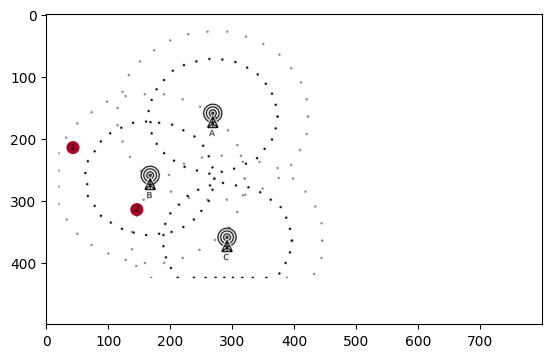

In [26]:
# Generated from the parsed LLM Output

from mobile_env.core.base import MComCore
from mobile_env.core.entities import BaseStation, UserEquipment


class CustomEnv0(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            "seed": 1534,
            'reset_rng_episode': True,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        # two cells next to each other; unpack config defaults for other params
        stations = [
            # BaseStation(bs_id=0, pos=(110, 130), **env_config["bs"]),
            BaseStation(bs_id=0, pos=(65, 80), **env_config["bs"]),
            # BaseStation(bs_id=2, pos=(120, 30), **env_config["bs"])
        ]

        # users
        users = [
            # two stationary moving users with config defaults
            UserEquipment(ue_id=1, velocity=0, snr_tr=env_config["ue"]["snr_tr"], noise=env_config["ue"]["noise"],
                          height=env_config["ue"]["height"]),
            # stationary user --> set velocity to 0
            UserEquipment(ue_id=2, velocity=0, snr_tr=env_config["ue"]["snr_tr"], noise=env_config["ue"]["noise"],
                          height=env_config["ue"]["height"]),
        ]

        super().__init__(stations, users, config, render_mode)

class CustomEnv1(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            "seed": 1534,
            'reset_rng_episode': True,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        # two cells next to each other; unpack config defaults for other params
        stations = [
            # BaseStation(bs_id=0, pos=(110, 130), **env_config["bs"]),
            BaseStation(bs_id=0, pos=(65, 80), **env_config["bs"]),
            # BaseStation(bs_id=2, pos=(120, 30), **env_config["bs"])
        ]

        # users
        users = [
            # two  moving users with config defaults
            UserEquipment(ue_id=1, velocity=1, snr_tr=env_config["ue"]["snr_tr"], noise=env_config["ue"]["noise"],
                          height=env_config["ue"]["height"]),
            # stationary user --> set velocity to 0
            UserEquipment(ue_id=2, velocity=1, snr_tr=env_config["ue"]["snr_tr"], noise=env_config["ue"]["noise"],
                          height=env_config["ue"]["height"]),
        ]

        super().__init__(stations, users, config, render_mode)

class CustomEnv2(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            "seed": 1534,
            'reset_rng_episode': True,
        })
        # faster user movement
        config["ue"].update({
            "velocity": 5,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        # two cells next to each other; unpack config defaults for other params
        stations = [
            BaseStation(bs_id=0, pos=(110, 130), **env_config["bs"]),
            BaseStation(bs_id=1, pos=(65, 80), **env_config["bs"]),
            BaseStation(bs_id=2, pos=(120, 30), **env_config["bs"])
        ]

        # users
        users = [
            # two fast moving users with config defaults
            UserEquipment(ue_id=1, **env_config["ue"]),
            UserEquipment(ue_id=2, **env_config["ue"]),
        ]

        super().__init__(stations, users, config, render_mode)


# init and render the custom scenario
env0 = CustomEnv0(render_mode="rgb_array")
env0.reset()
dummy_action = env0.action_space.sample()
_,_,_,_,_ = env0.step(dummy_action)

env1 = CustomEnv1(render_mode="rgb_array")
env1.reset()
_,_,_,_,_ = env1.step(dummy_action)

env2 = CustomEnv2(render_mode="rgb_array")
env2.reset()
_,_,_,_,_ = env2.step(dummy_action)


plt.imshow(env0.render())
plt.imshow(env1.render())
plt.imshow(env2.render())
# for _ in range(10):
#     # here, use random dummy actions by sampling from the action space
#     dummy_action = env.action_space.sample()
#     obs, reward, terminated, truncated, info = env.step(dummy_action)

#     # render the environment
#     plt.imshow(env.render())
#     display.display(plt.gcf())
#     display.clear_output(wait=True)

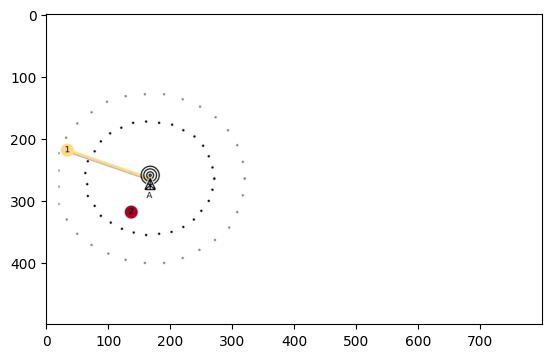

In [27]:
plt.imshow(env1.render())

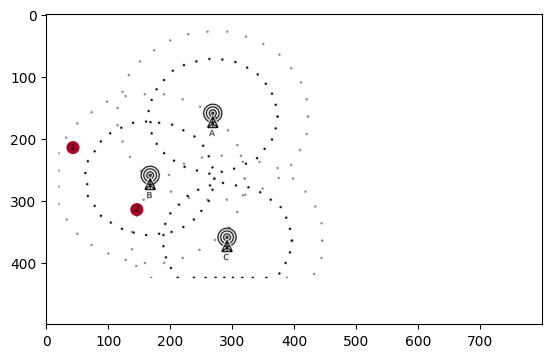

In [28]:
plt.imshow(env2.render())

In [33]:

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

# create the custom env with the custom handler (obs space) from step 2
env = CustomEnv0()

# train PPO agent on environment. this takes a while
model = PPO(MlpPolicy, env, tensorboard_log='results_sb', verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_42
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -36.3    |
| time/              |          |
|    fps             | 195      |
|    iterations      | 1        |
|    time_elapsed    | 10       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -34.1       |
| time/                   |             |
|    fps                  | 163         |
|    iterations           | 2           |
|    time_elapsed         | 24          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015783744 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2  

In [34]:
env = CustomEnv1()
model.set_env(env)
model.learn(total_timesteps=10000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_43
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -17.9    |
| time/              |          |
|    fps             | 177      |
|    iterations      | 1        |
|    time_elapsed    | 11       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -16.7       |
| time/                   |             |
|    fps                  | 163         |
|    iterations           | 2           |
|    time_elapsed         | 25          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014748005 |
|    clip_fraction        | 0.167       |
|    clip_range           | 0.2         |
|    ent

In [35]:
env = CustomEnv2()
model.set_env(env)
model.learn(total_timesteps=15000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_44
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -8.52    |
| time/              |          |
|    fps             | 198      |
|    iterations      | 1        |
|    time_elapsed    | 10       |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 100        |
|    ep_rew_mean          | -6.2       |
| time/                   |            |
|    fps                  | 180        |
|    iterations           | 2          |
|    time_elapsed         | 22         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01322986 |
|    clip_fraction        | 0.142      |
|    clip_range           | 0.2        |
|    entropy_loss    

In [9]:
model.save("curriculum_30000steps")

In [36]:
class FinalTrainEnv(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            "seed": 1534,
            'reset_rng_episode': True,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        station_pos = [(110, 130), (65, 80), (120, 30)]
        stations = [
            BaseStation(bs_id, pos, **env_config["bs"])
            for bs_id, pos in enumerate(station_pos)
        ]
        num_ues = 5
        users = [UserEquipment(ue_id, **env_config["ue"]) for ue_id in range(num_ues)]

        super().__init__(stations, users, config, render_mode)

env = FinalTrainEnv()
model.set_env(env)
model.learn(total_timesteps=400000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_45
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | 0.019    |
| time/              |          |
|    fps             | 219      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 100        |
|    ep_rew_mean          | 0.285      |
| time/                   |            |
|    fps                  | 188        |
|    iterations           | 2          |
|    time_elapsed         | 21         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01483269 |
|    clip_fraction        | 0.181      |
|    clip_range           | 0.2        |
|    entropy_loss    

In [23]:
model.save("curriculum_400000")

In [44]:
class UnseenEnvironment(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            "seed": 1937,
            'reset_rng_episode': True,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        station_pos = [(150, 100), (35, 40), (20, 130)]
        stations = [
            BaseStation(bs_id, pos, **env_config["bs"])
            for bs_id, pos in enumerate(station_pos)
        ]
        num_ues = 6
        users = [UserEquipment(ue_id, **env_config["ue"]) for ue_id in range(num_ues)]

        super().__init__(stations, users, config, render_mode)

# init and render the custom scenario
env = UnseenEnvironment(render_mode="rgb_array")
env.reset()
obs, info = env.reset()
done = False

rewards_list = []
time_steps = []
i=0
# run one episode with the trained model
while not done:
    action, _ = model.predict(obs)
    i+=1
    # perform step on simulation environment
    obs, reward, terminated, truncated, info = env.step(action)
    rewards_list.append(reward)
    time_steps.append(i)

    done = terminated or truncated

    # # render environment as RGB
    # plt.imshow(env.render())
    # display.display(plt.gcf())
    # display.clear_output(wait=True)

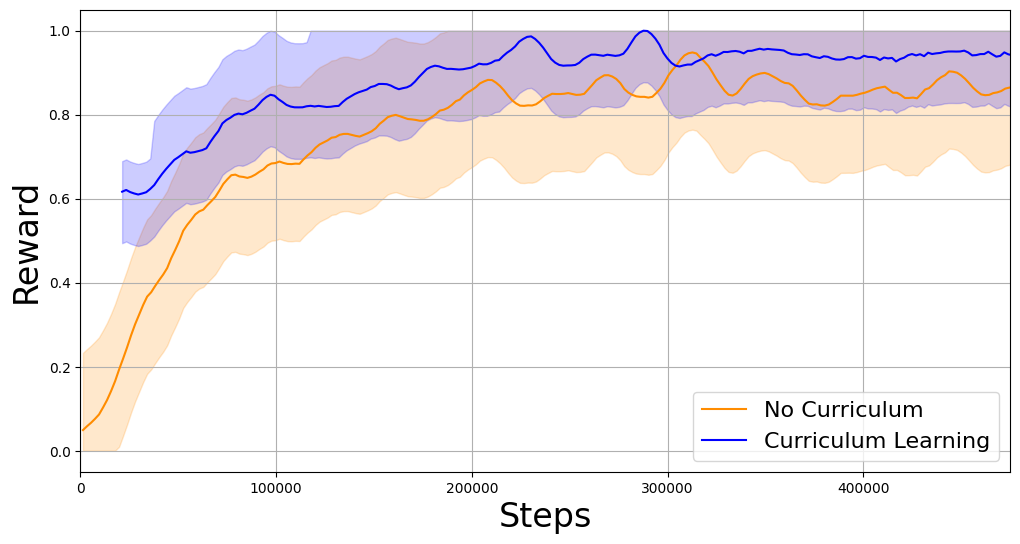

In [48]:

from tensorboard.backend.event_processing import event_accumulator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem, t

def load_tensorboard_logs(log_dir, tag):


    ea = event_accumulator.EventAccumulator(log_dir,
                                            size_guidance={event_accumulator.SCALARS: 0})  
    # Load the data
    ea.Reload()
    
    if tag in ea.Tags()['scalars']:
        values = [scalar.value for scalar in ea.Scalars(tag)]
        steps = [scalar.step for scalar in ea.Scalars(tag)]  
        return np.array(steps), np.array(values)
    else:
        print("Tag not found in TensorBoard logs:", tag)
        return np.array([]), np.array([])



# Load the first set of logs
log_dir1 = 'results_sb/PPO_27' # One shot training different notebook
steps1, rewards1 = load_tensorboard_logs(log_dir1, 'rollout/ep_rew_mean')

# Load the second set of logs
log_dir2 = 'results_sb/PPO_45'  
steps2, rewards2 = load_tensorboard_logs(log_dir2, 'rollout/ep_rew_mean')  
steps2+=30000 # steps on curriculum training


window_size = 8 

min_reward = min(np.min(rewards1), np.min(rewards2))
max_reward = max(np.max(rewards1), np.max(rewards2))

normalized_rewards1 = (rewards1 - min_reward) / (max_reward - min_reward)
normalized_rewards2 = (rewards2 - min_reward) / (max_reward - min_reward)



smoothed_rewards1 = pd.Series(normalized_rewards1).rolling(window=window_size).mean()
smoothed_rewards2 = pd.Series(normalized_rewards2).rolling(window=window_size).mean()

# Calculate the standard error of the mean (SEM)
sem1 = sem(rewards1)  
sem2 = sem(rewards2)  

# Confidence intervals
confidence = 0.9
ci1 = sem1 * t.ppf((1 + confidence) / 2., len(rewards1) - 1)
ci2 = sem2 * t.ppf((1 + confidence) / 2., len(rewards2) - 1)


plt.figure(figsize=(12, 6))

# Clip the values 
adjusted_ci1_upper = np.minimum(ci1, 1 - smoothed_rewards1)
adjusted_ci1_lower = np.minimum(ci1, smoothed_rewards1)

adjusted_ci2_upper = np.minimum(ci2, 1 - smoothed_rewards2)
adjusted_ci2_lower = np.minimum(ci2, smoothed_rewards2)

plt.xlim([0, 475000])
plt.plot(steps1-15000, smoothed_rewards1, linestyle='-', color='darkorange', label='No Curriculum')
plt.fill_between(steps1-15000, smoothed_rewards1 - adjusted_ci1_lower, smoothed_rewards1 + adjusted_ci1_upper, color='darkorange', alpha=0.2)

plt.plot(steps2-15000, smoothed_rewards2, linestyle='-', color='b', label='Curriculum Learning') 
plt.fill_between(steps2-15000, smoothed_rewards2 - adjusted_ci2_lower, smoothed_rewards2 + adjusted_ci2_upper, color='b', alpha=0.2) 

plt.xlabel('Steps', fontsize=24)
plt.ylabel('Reward', fontsize=24)
plt.legend(loc='lower right')
plt.legend()
plt.grid(True)


plt.legend(prop={'size': 16})
plt.show()
